# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_time_pre_proc.csv'

file_tag = "Google Merch Shop Time Series"


## DSLabs

In [2]:
%run "scripts/dslabs_functions.py"


# data functions

In [3]:
%run "scripts/data_functions.py"

data_functions loaded


# Load

In [ ]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath, decimal=".",  index_col='date_hour', parse_dates=True,  infer_datetime_format=True)




else:
    data=pd.read_csv(filepath, decimal=".", index_col='date_hour', parse_dates=True,  infer_datetime_format=True)

# Ensure the columns exist in the dataframe
columns_to_select = [
    'total_session_id',
    'total_first_visit_session',
    'total_view_item_session',
    'total_begin_checkout_session',
    'total_purchase_session',
    'day_of_week_nr',
    'is_weekend',
    'is_holiday',
    'is_major_event_day',
    'is_commercial_event_day'
]

# Select only the columns that exist in the dataframe
data = data[[col for col in columns_to_select if col in data.columns]]


data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2020-11-01 00:00:00 to 2021-01-31 23:00:00
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   total_session_id              2208 non-null   int64
 1   total_first_visit_session     2208 non-null   int64
 2   total_view_item_session       2208 non-null   int64
 3   total_begin_checkout_session  2208 non-null   int64
 4   total_purchase_session        2208 non-null   int64
 5   day_of_week_nr                2208 non-null   int64
 6   is_weekend                    2208 non-null   int64
 7   is_holiday                    2208 non-null   int64
 8   is_major_event_day            2208 non-null   int64
 9   is_commercial_event_day       2208 non-null   int64
dtypes: int64(10)
memory usage: 189.8 KB


In [22]:
series: Series = data['total_session_id']


# Dimensionality

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


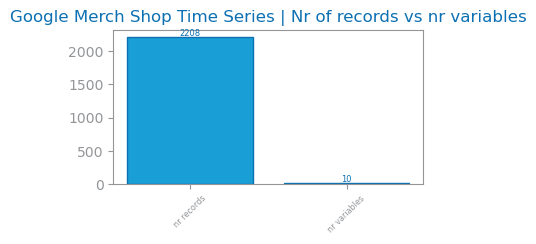

In [5]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

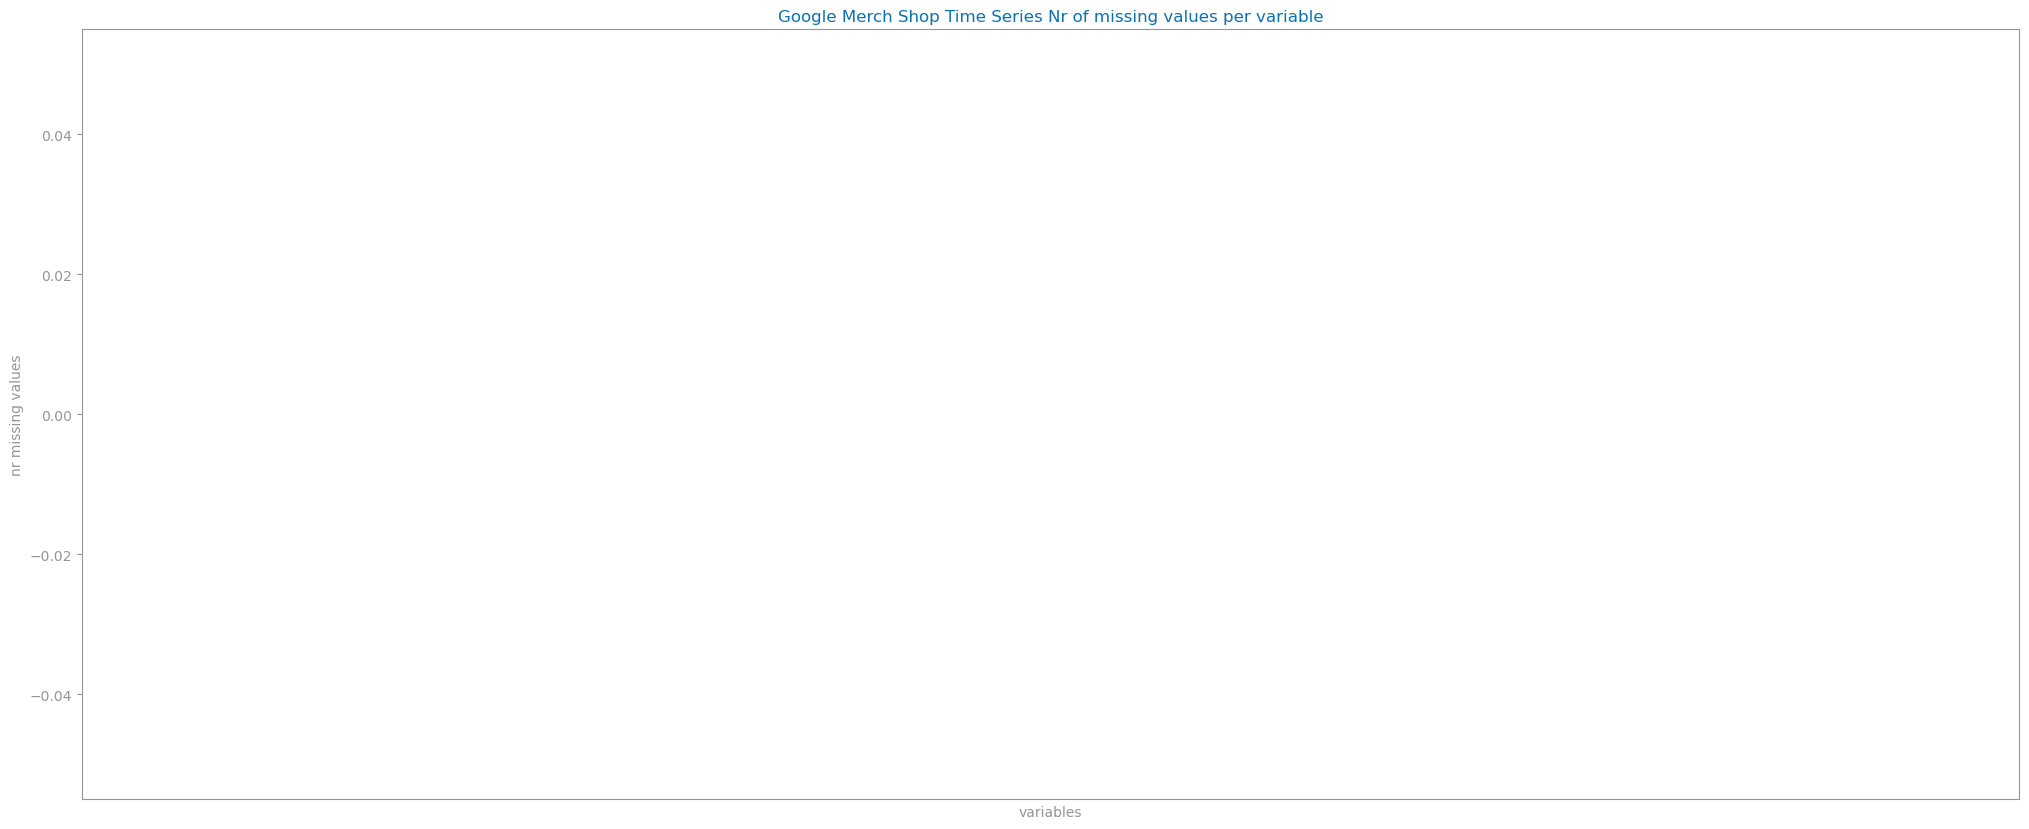

In [6]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

savefig(f"images/{file_tag}_mv.png")
show()

## Variables Type

In [7]:
data.dtypes


total_session_id                int64
total_first_visit_session       int64
total_view_item_session         int64
total_begin_checkout_session    int64
total_purchase_session          int64
day_of_week_nr                  int64
is_weekend                      int64
is_holiday                      int64
is_major_event_day              int64
is_commercial_event_day         int64
dtype: object

In [8]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

{'numeric': ['total_session_id', 'total_first_visit_session', 'total_view_item_session', 'total_begin_checkout_session', 'total_purchase_session', 'day_of_week_nr'], 'binary': ['is_weekend', 'is_holiday', 'is_major_event_day', 'is_commercial_event_day'], 'date': [], 'symbolic': []}


### variables per type plot

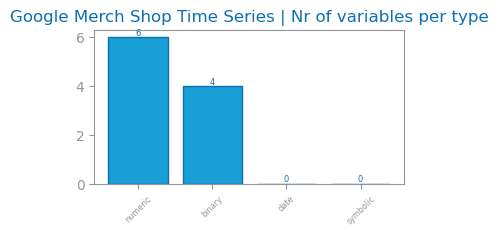

In [9]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} | Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

# Data Distribution

## describe

In [10]:
summary5: DataFrame = data.describe(include="all")
summary5

,total_session_id,total_first_visit_session,total_view_item_session,total_begin_checkout_session,total_purchase_session,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,88.360507,59.842844,19.184783,2.731884,1.152627,3.032609,0.293478,0.054348,0.043478,0.021739
std,25.833360,17.229526,7.978352,2.197877,1.300302,2.013733,0.455459,0.226754,0.203977,0.145864
min,34.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,48.000000,13.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,86.000000,58.000000,18.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,104.000000,69.000000,24.000000,4.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000
max,202.000000,136.000000,47.000000,16.000000,11.000000,6.000000,1.000000,1.000000,1.000000,1.000000


## Numeric Variables

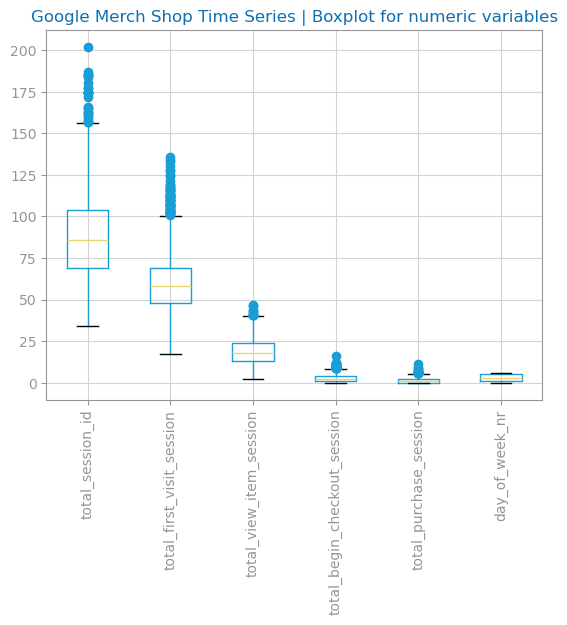

In [11]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    data[numeric].boxplot(rot=90)
    title(f'{file_tag} | Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

# multivariate chart

Nr. Records =  (2208, 10)
First timestamp 2020-11-01 00:00:00
Last timestamp 2021-01-31 23:00:00


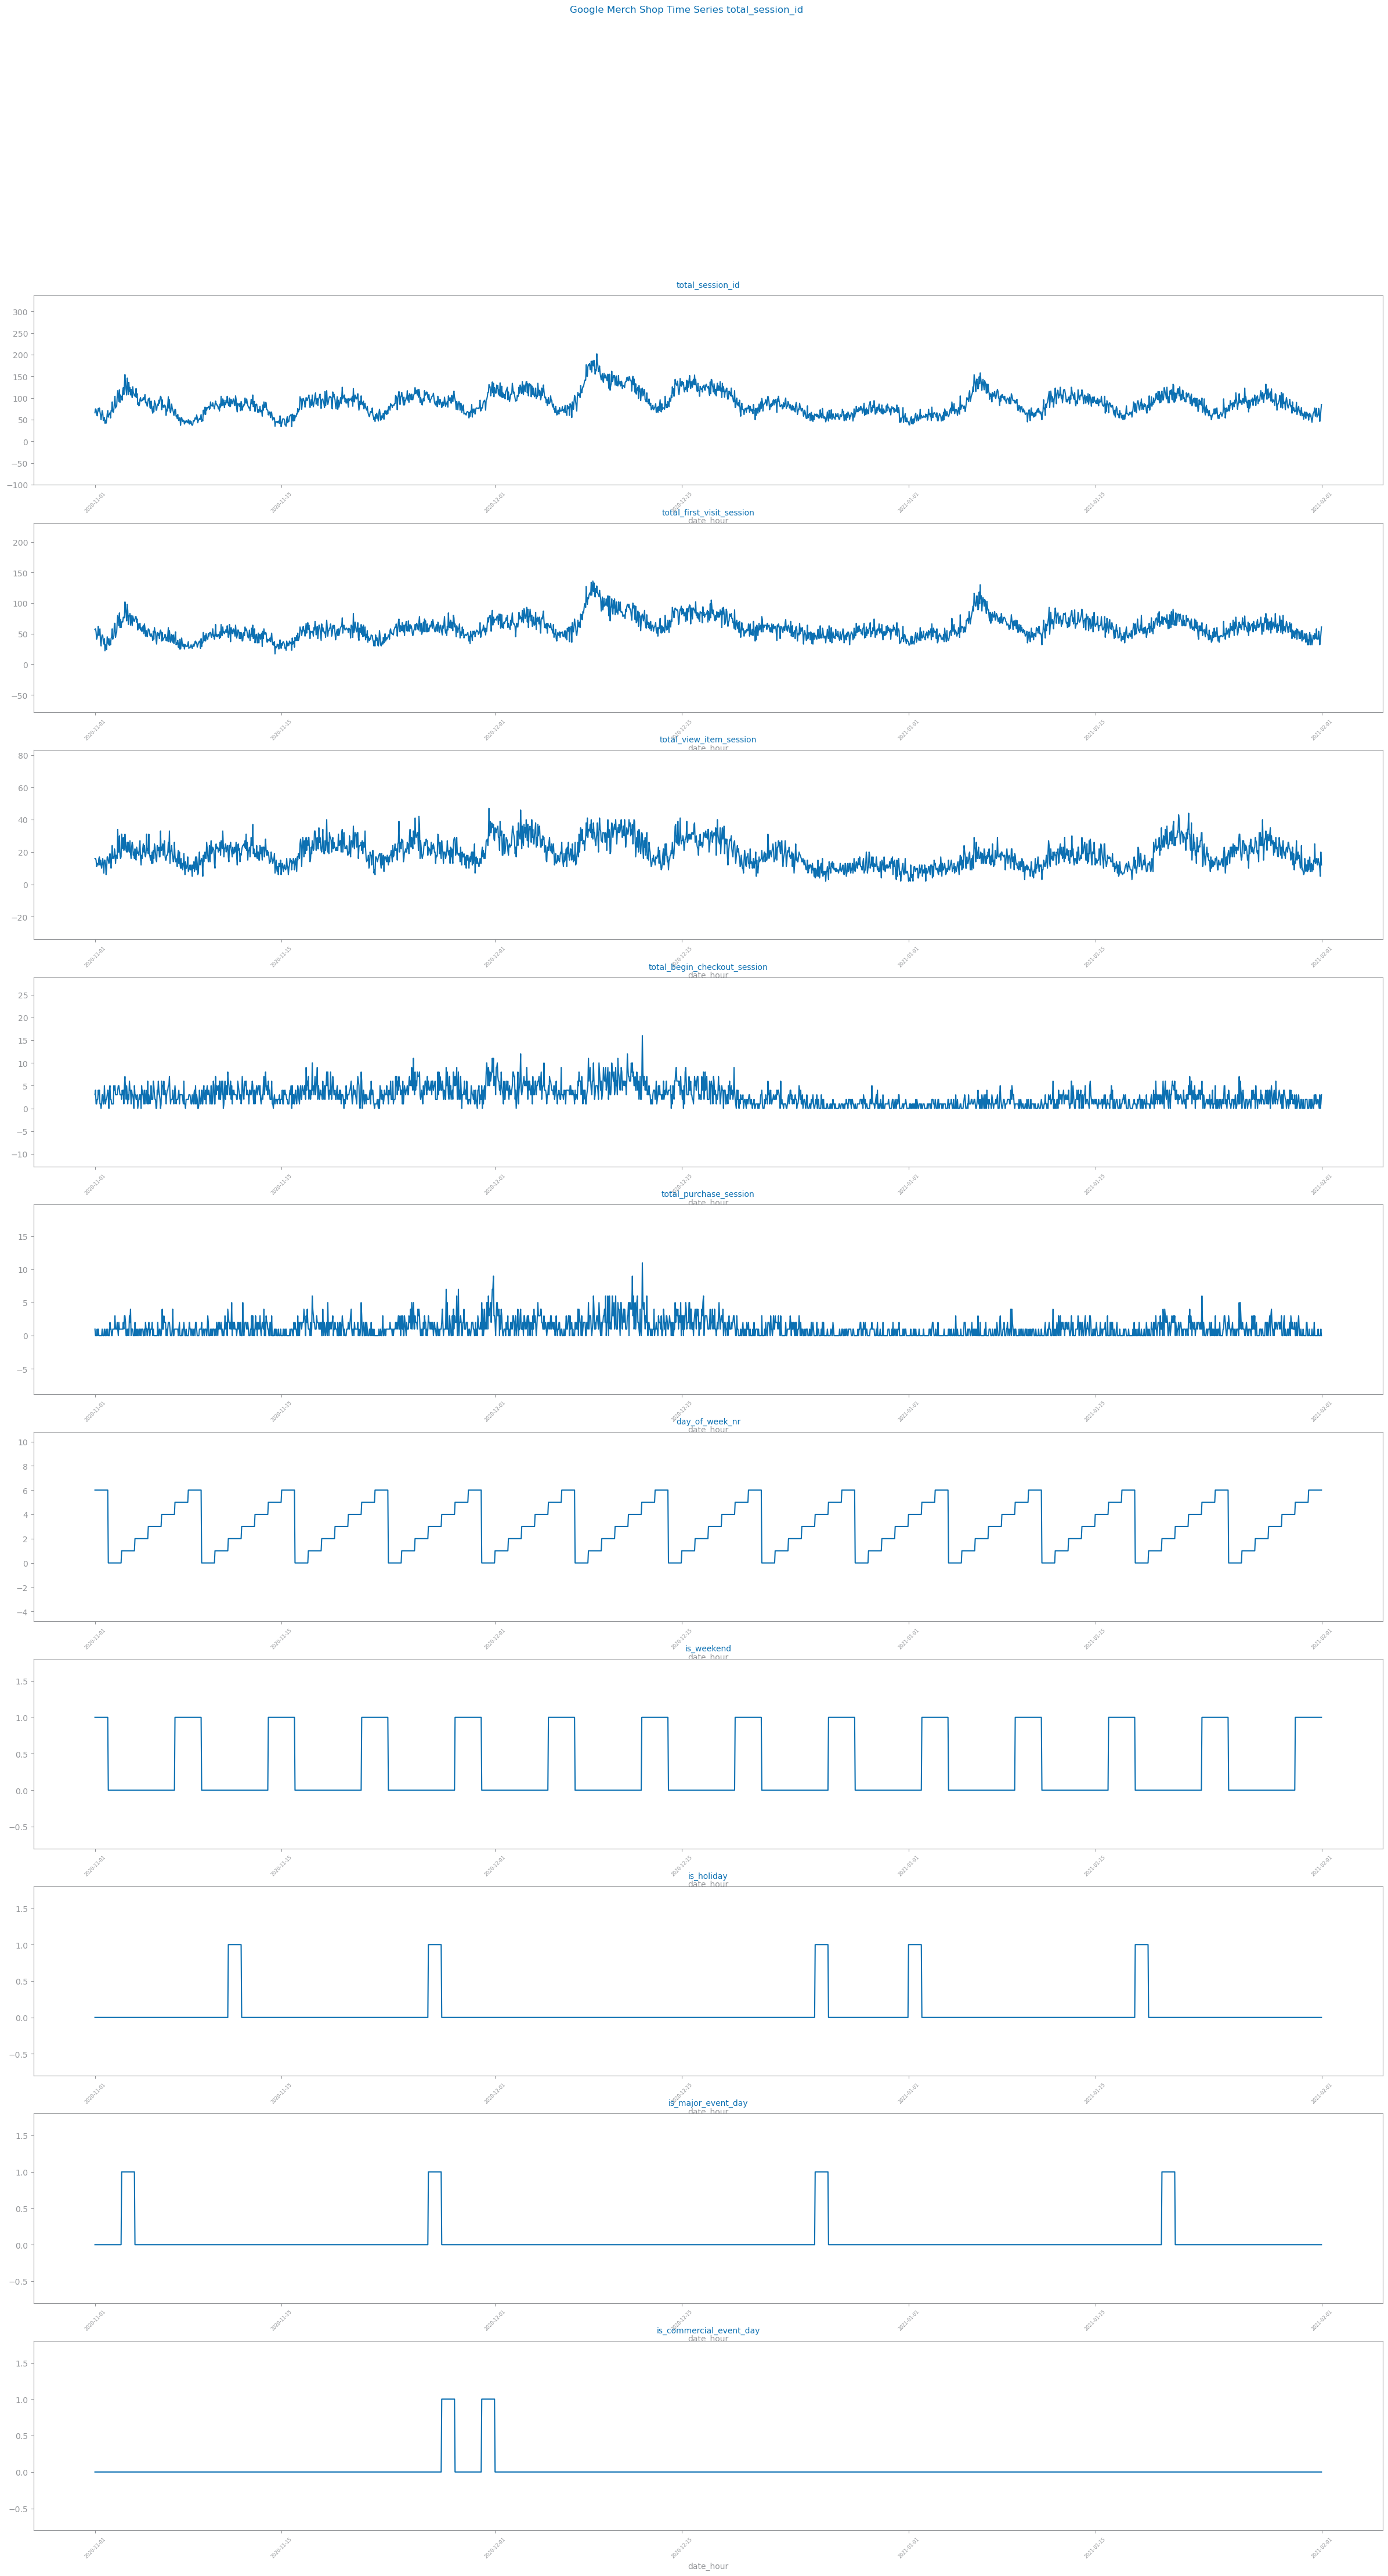

In [12]:
print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])


target = "total_session_id"


plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")
show()

## numeric variables distribution breakdown

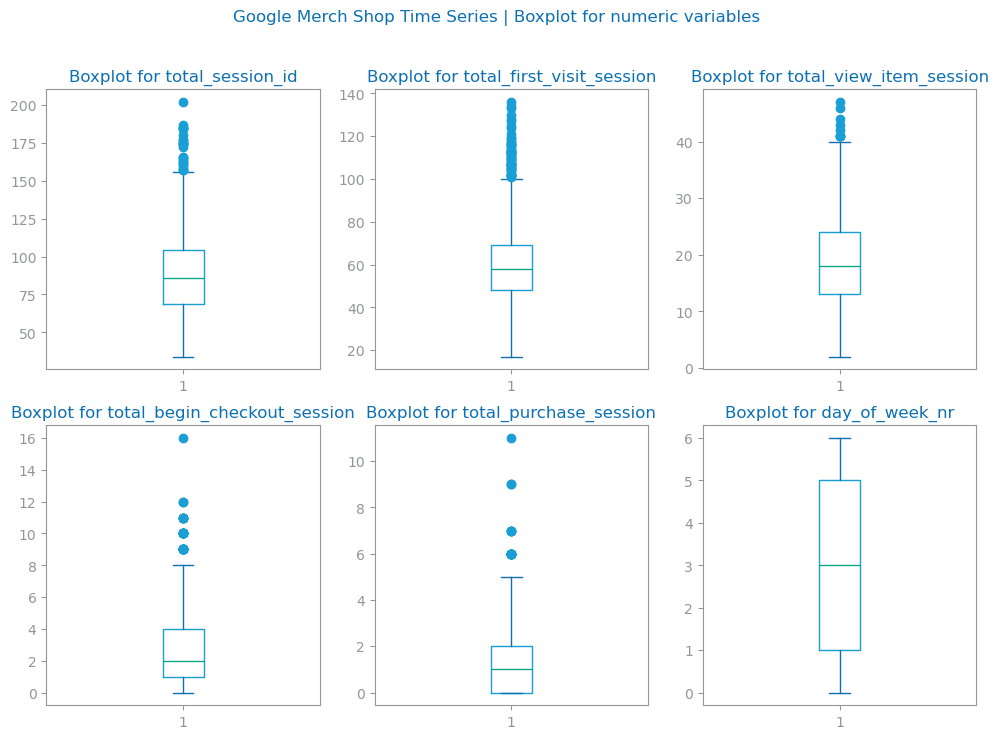

In [13]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

# Sparsity
Heavy processing. using 1% sample

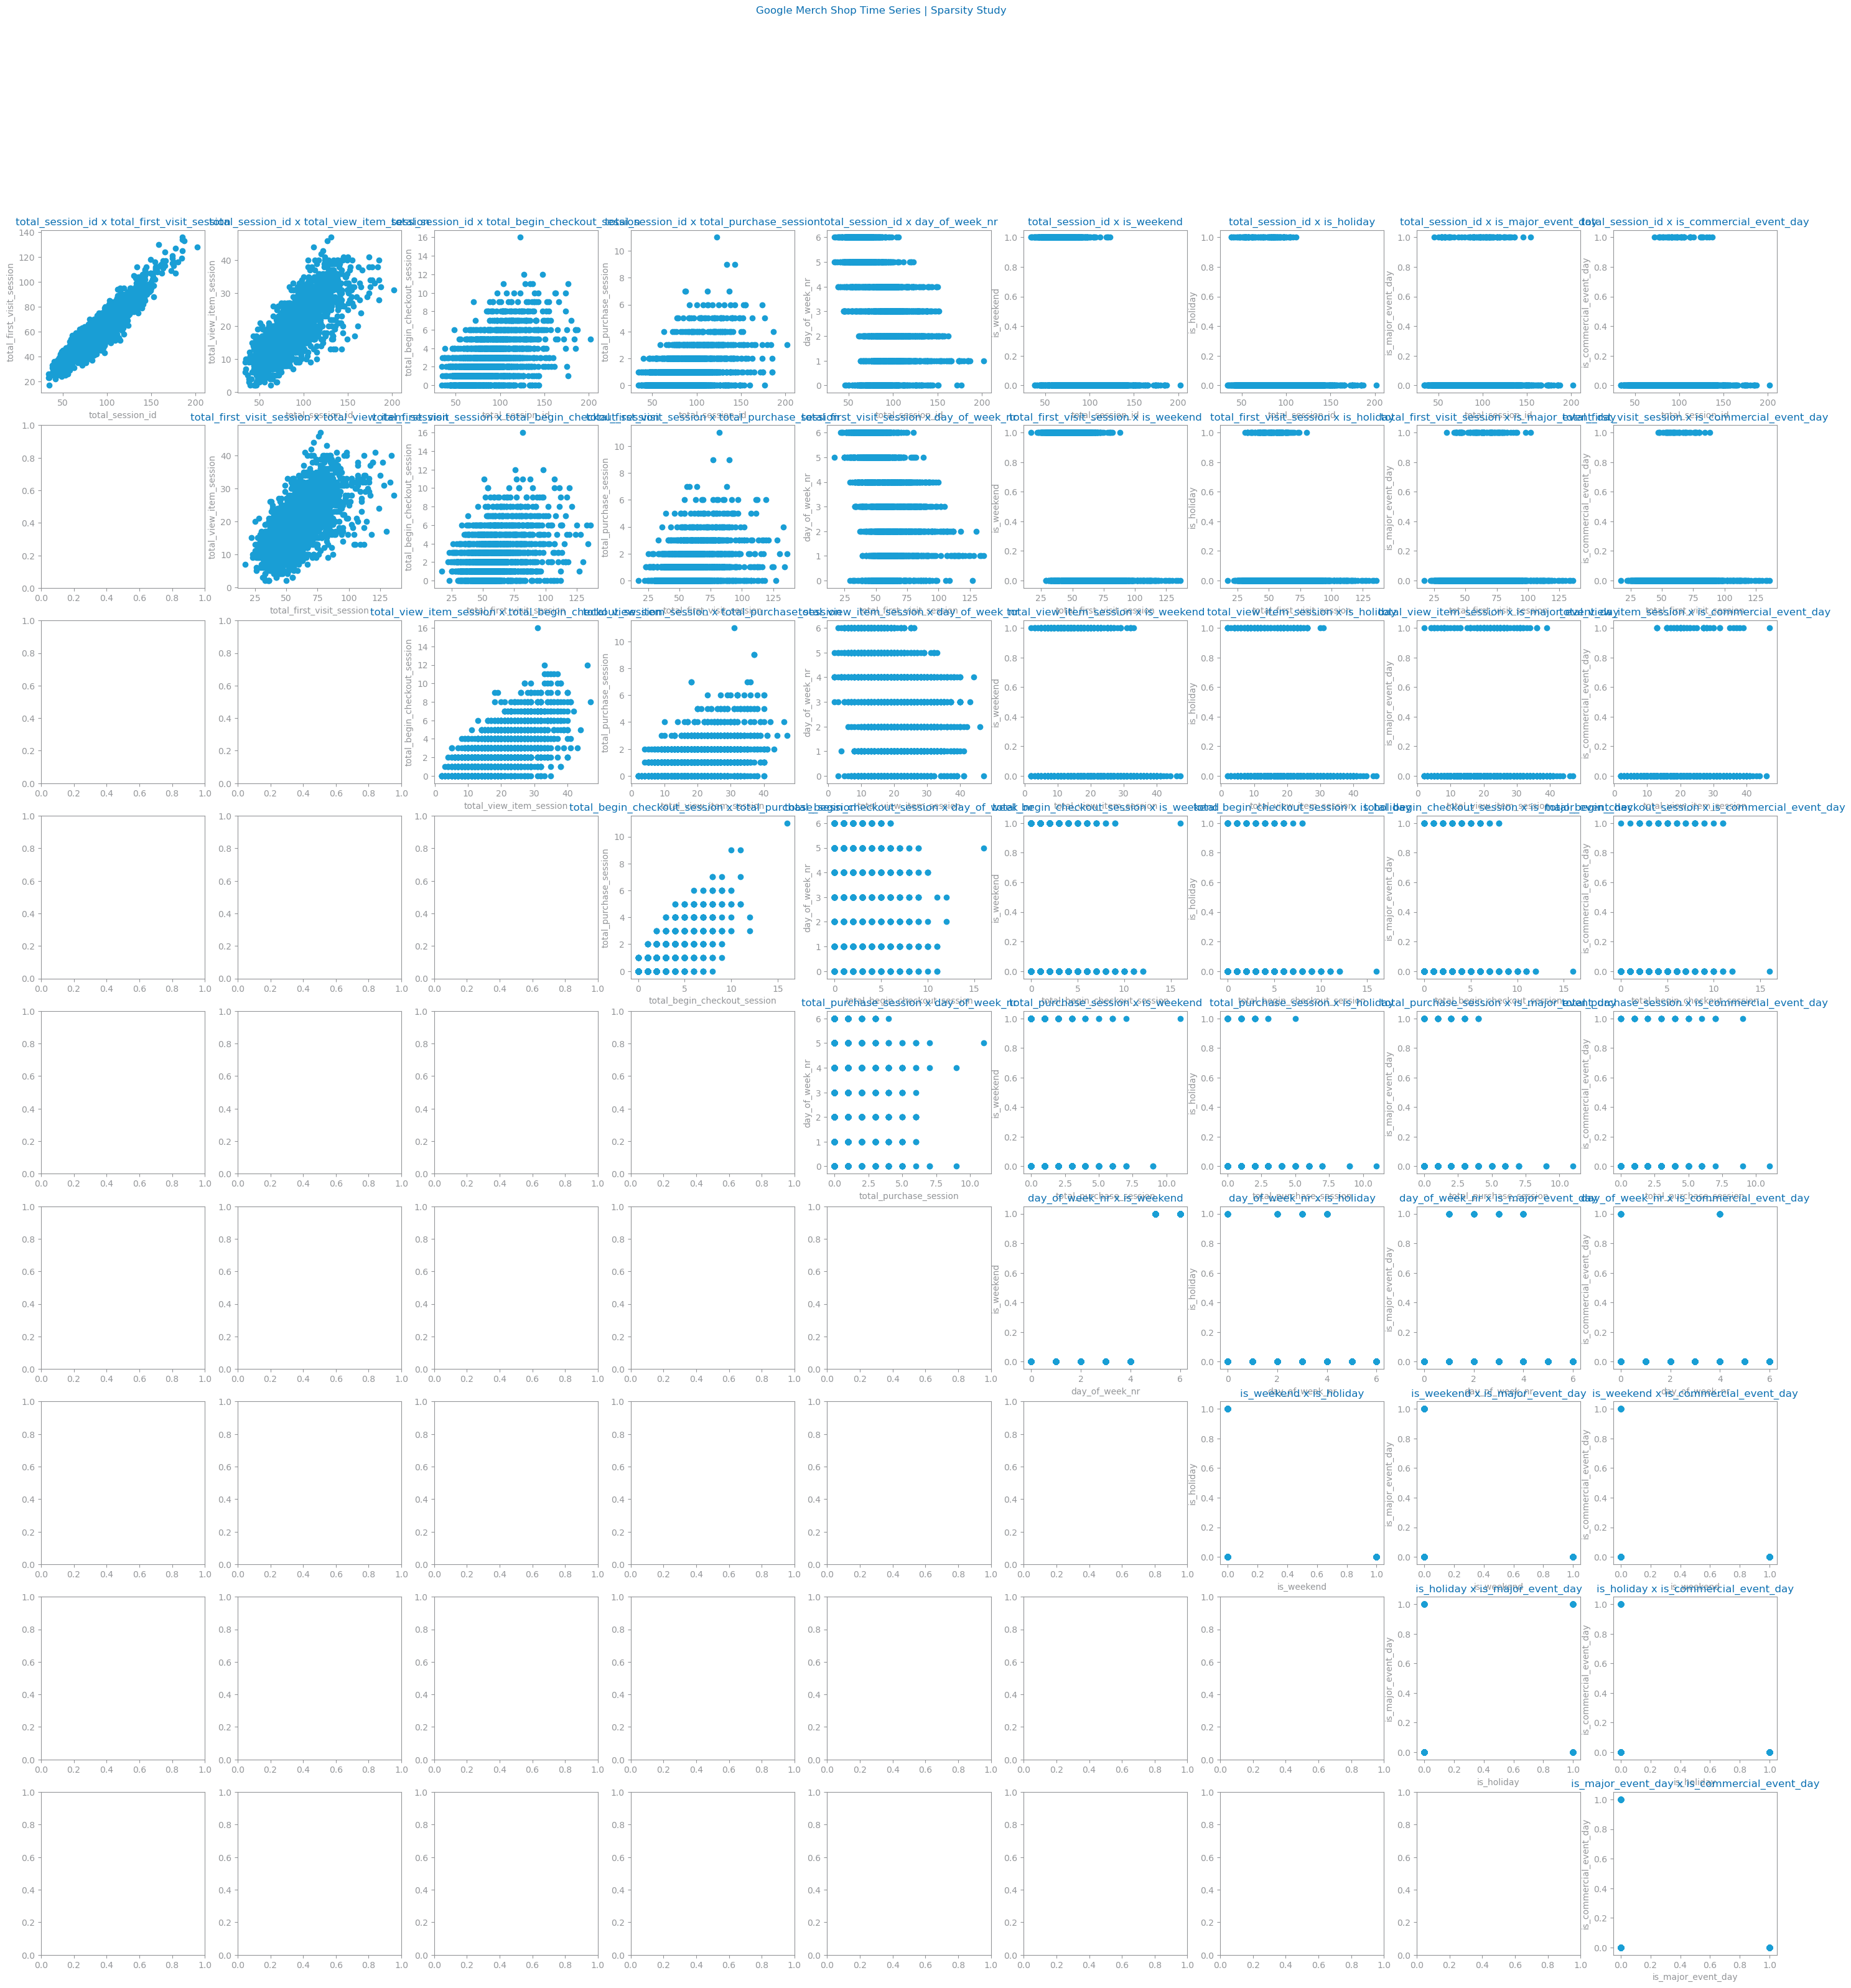

In [14]:
from numpy import ndarray
from pandas import DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

# sampled_data = sampled_data.dropna()

vars: list = data.columns.to_list()
if [] != vars:
    target = "total_session_id"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)

    fig.suptitle(f'{file_tag} | Sparsity Study')

    
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, ax=axs[i, j - 1])
    savefig(f"images/{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")

# Correlation Analysis

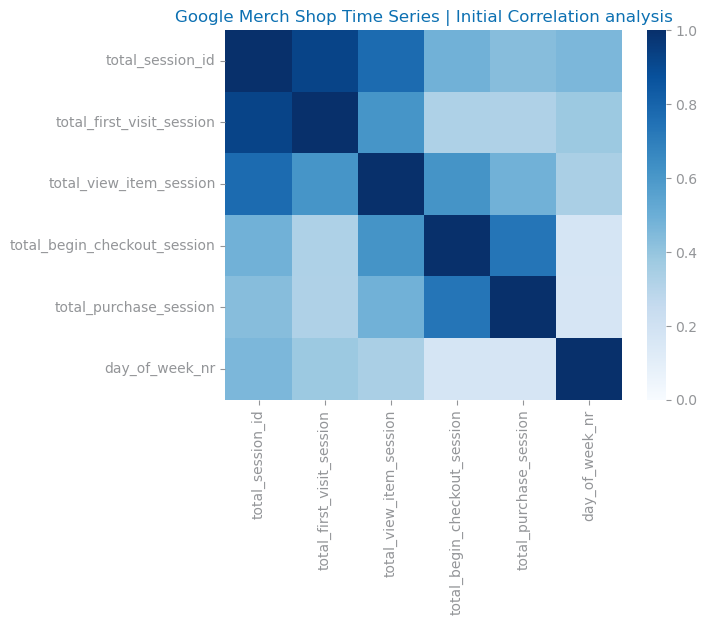

In [15]:
from seaborn import heatmap
from dslabs_functions import get_variable_types
from matplotlib.pyplot import figure, title, savefig, show

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)

title(f'{file_tag} | Initial Correlation analysis')

savefig(f"images/{file_tag}_correlation_analysis.png")
show()

# Series analysis

## Distribution

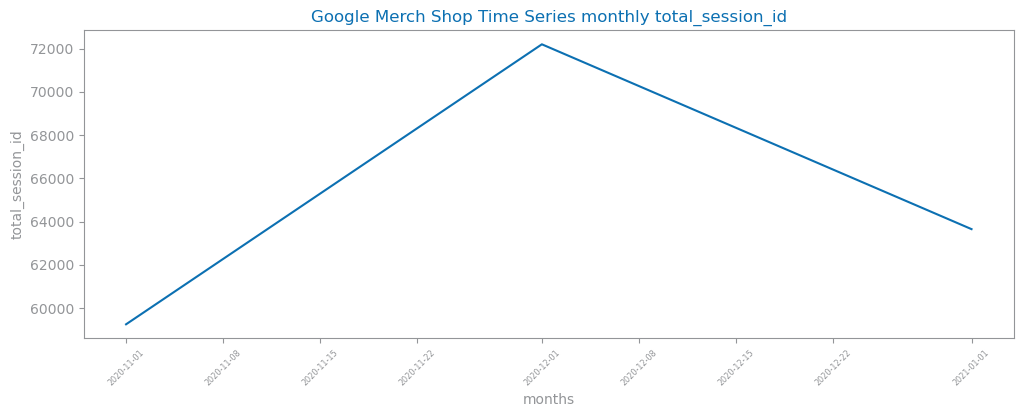

In [45]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} monthly {target}",
)
show()

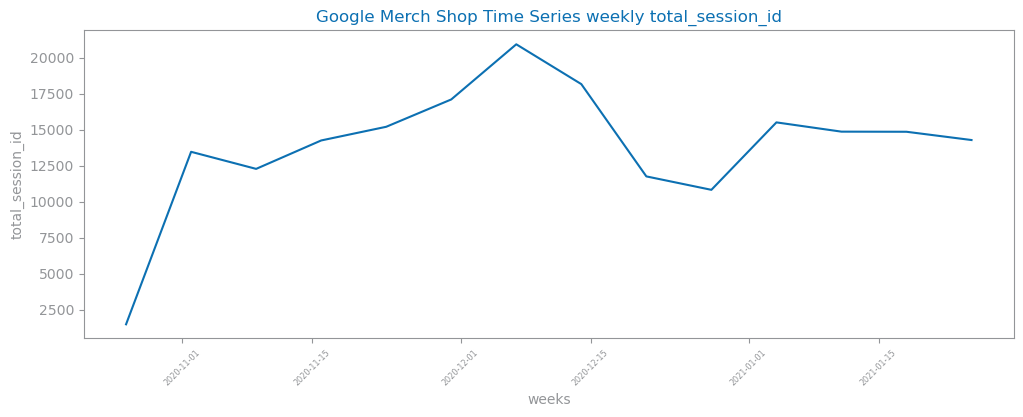

In [46]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
show()

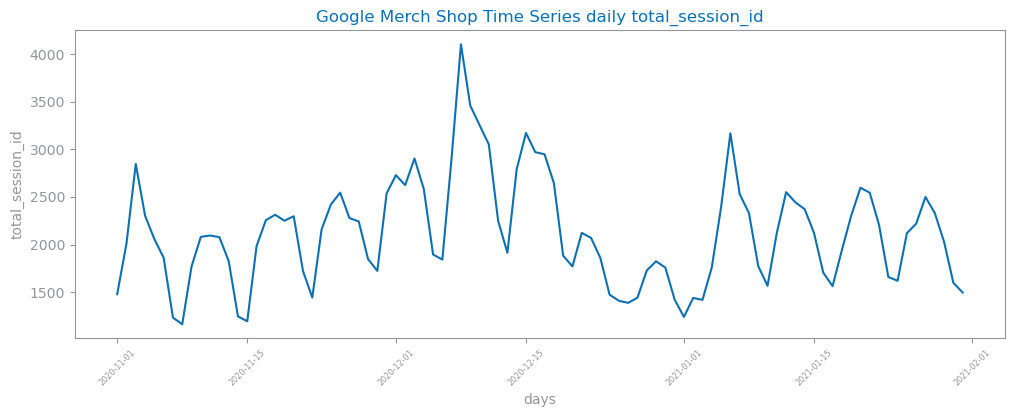

In [47]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
show()

## Distribution summary 5

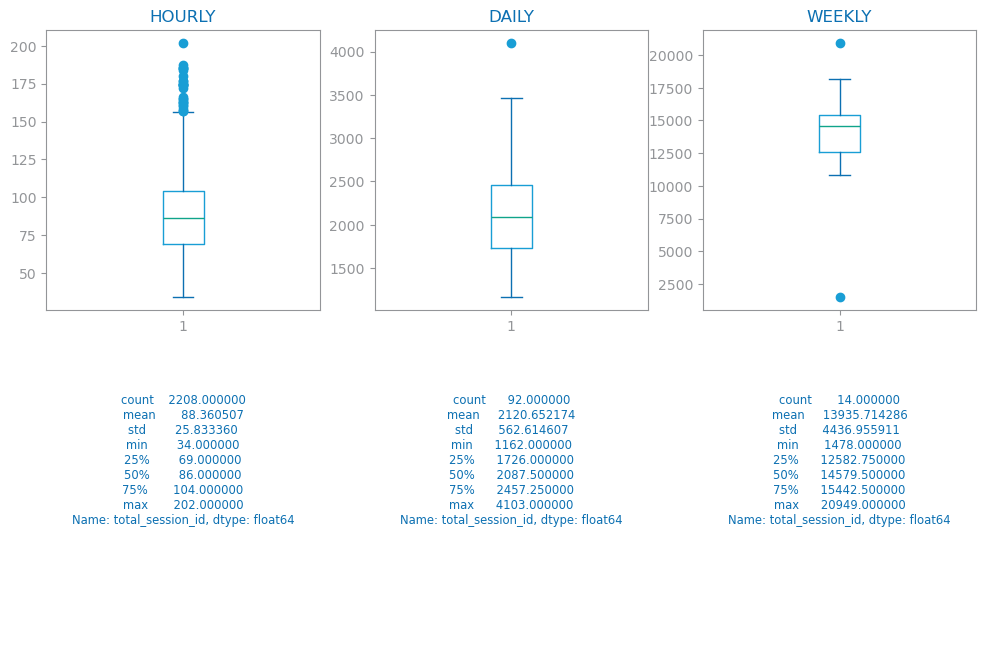

In [48]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels
fig: Figure
axs: array
fig, axs = subplots(2, 3, figsize=(3 * HEIGHT, 2 * HEIGHT))

set_chart_labels(axs[0, 0], title="HOURLY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="DAILY")
axs[0, 1].boxplot(ss_days)
set_chart_labels(axs[0, 2], title="WEEKLY")
axs[0, 2].boxplot(ss_weeks)

axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 1].grid(False)
axs[1, 1].set_axis_off()

# Add descriptions below each boxplot
descriptions = [
    str(series.describe()),
    str(ss_days.describe()),
    str(ss_weeks.describe())
]

for i, ax in enumerate(axs.flat[:3]):
    ax.text(0.5, -0.3, descriptions[i], transform=ax.transAxes, fontsize="small", ha="center", va="top")

# axs[1, 2].text(0.5, 0.5, str(series.describe()), transform=axs[1, 2].transAxes, fontsize="small", ha="center", va="center", wrap=True)
axs[1, 2].set_axis_off()

show()


## Variables Distribution

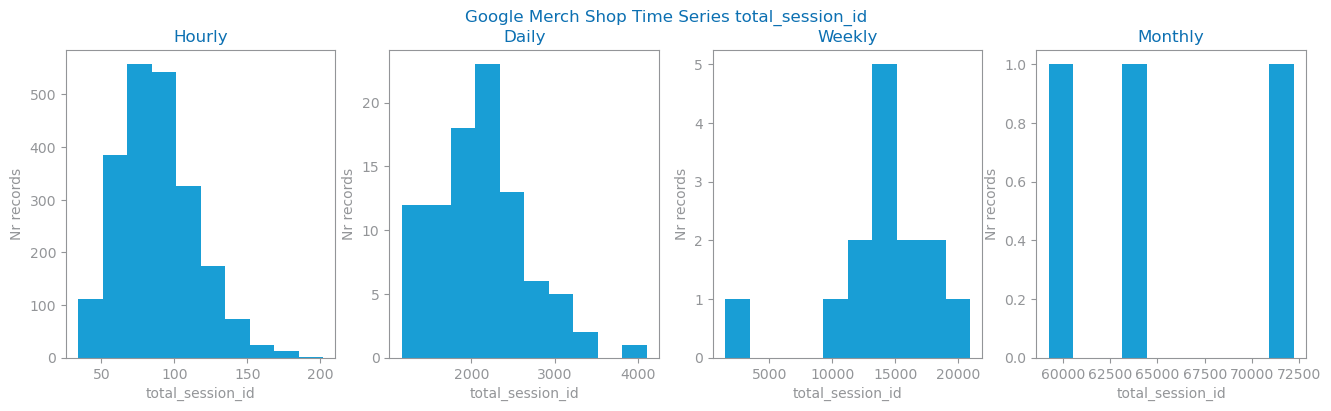

In [50]:

grans: list[Series] = [series, ss_days, ss_weeks, ss_months]
gran_names: list[str] = ["Hourly", "Daily", "Weekly", "Monthly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()

## Stationary

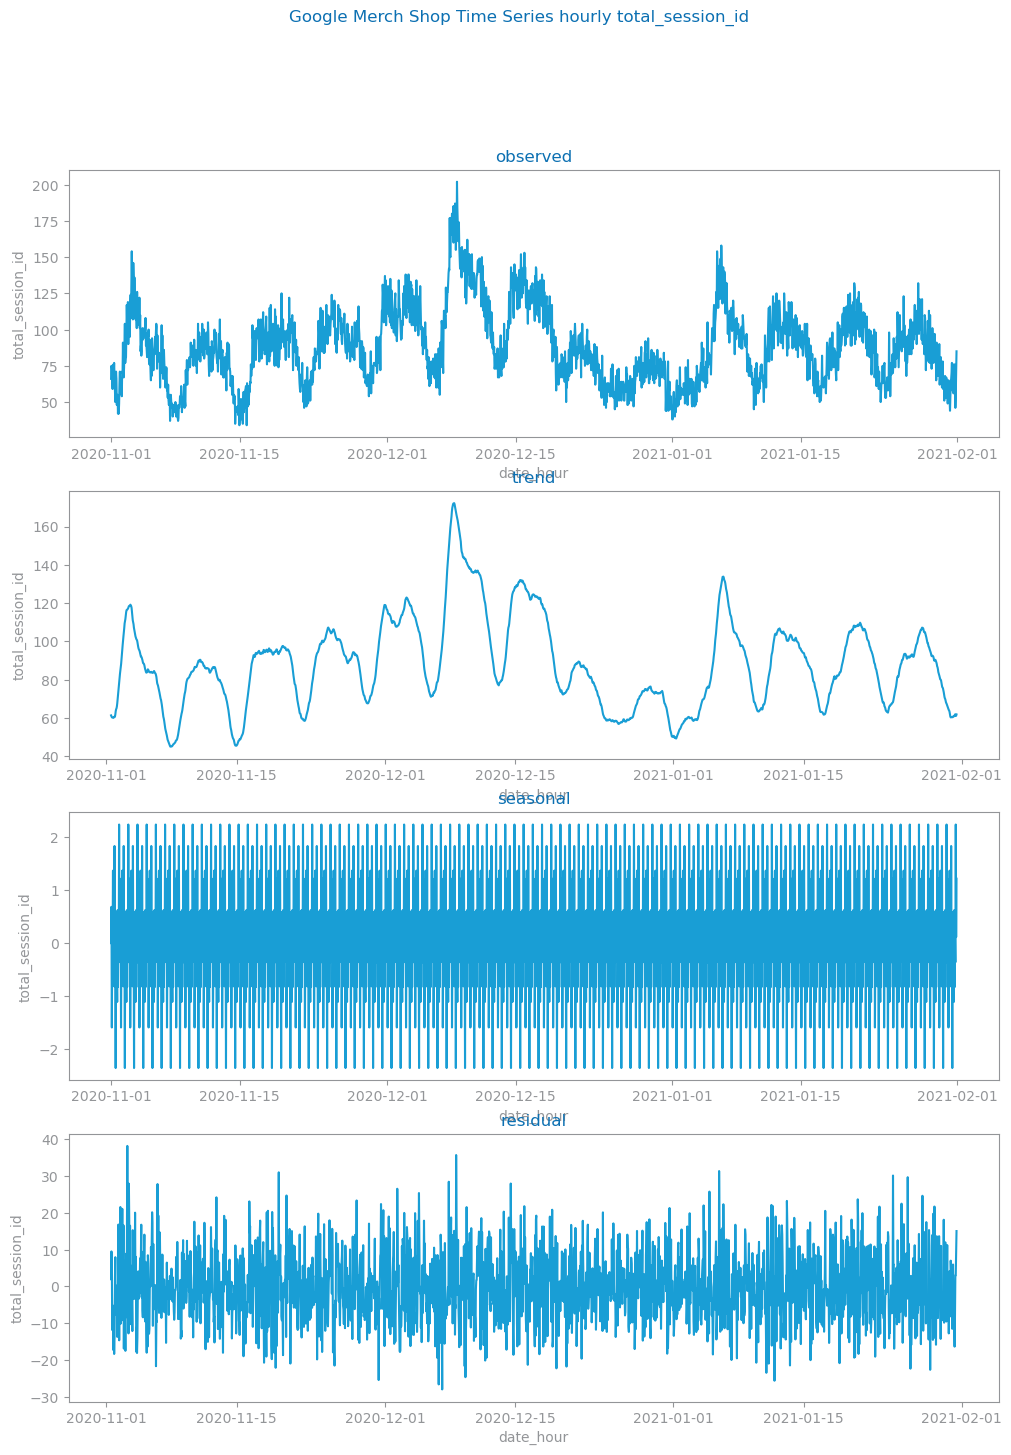

In [ ]:


plot_components(
    series,
    title=f"{file_tag} hourly {target}",
    x_label=series.index.name,
    y_label=target,
)
show()

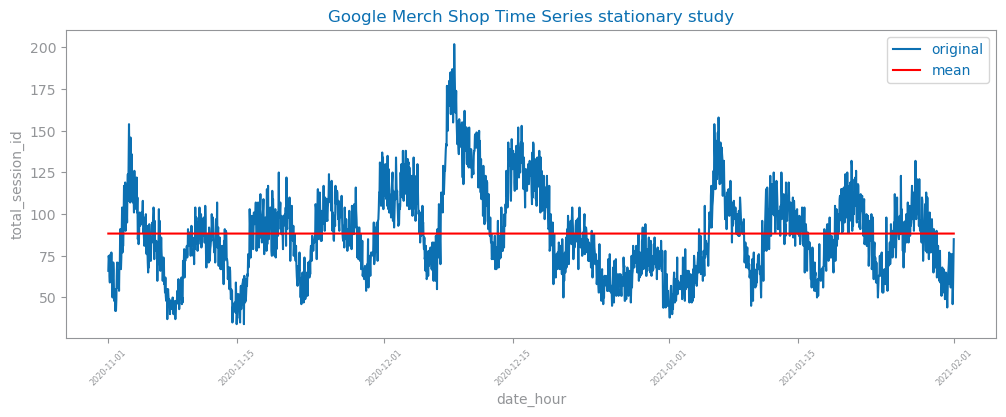

In [17]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
n: int = len(series)
plot(series.index, [series.mean()] * n, "r-", label="mean")
legend()
show()

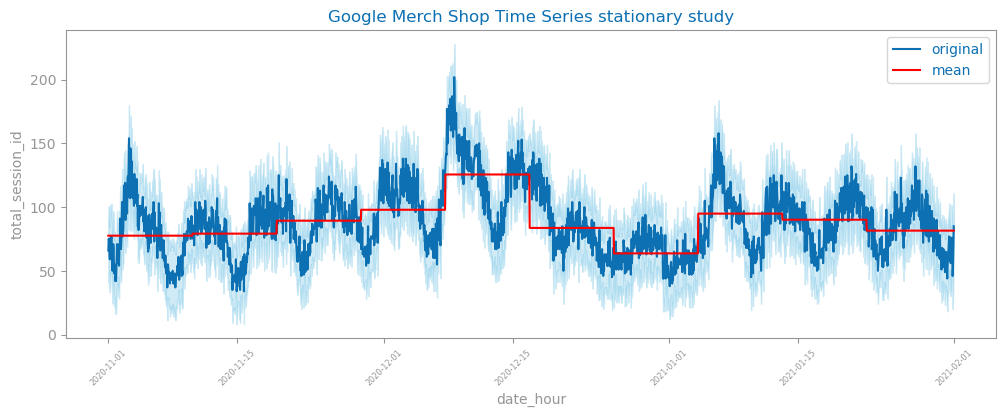

In [18]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = series[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
    show_stdev=True,
)
n: int = len(series)
plot(series.index, mean_line, "r-", label="mean")
legend()
show()

In [19]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(series: Series) -> bool:
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series {('is' if eval_stationarity(series) else 'is not')} stationary")

ADF Statistic: -5.472
p-value: 0.000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is stationary


## Autocorrelation

<Axes: ylabel='total_session_id'>

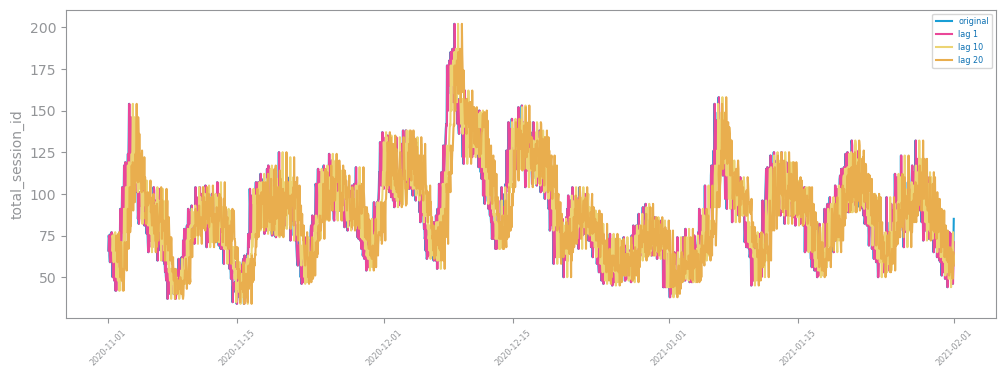

In [ ]:


figure(figsize=(3 * HEIGHT, HEIGHT))

# available in data_functions.py
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, ylabel=target)

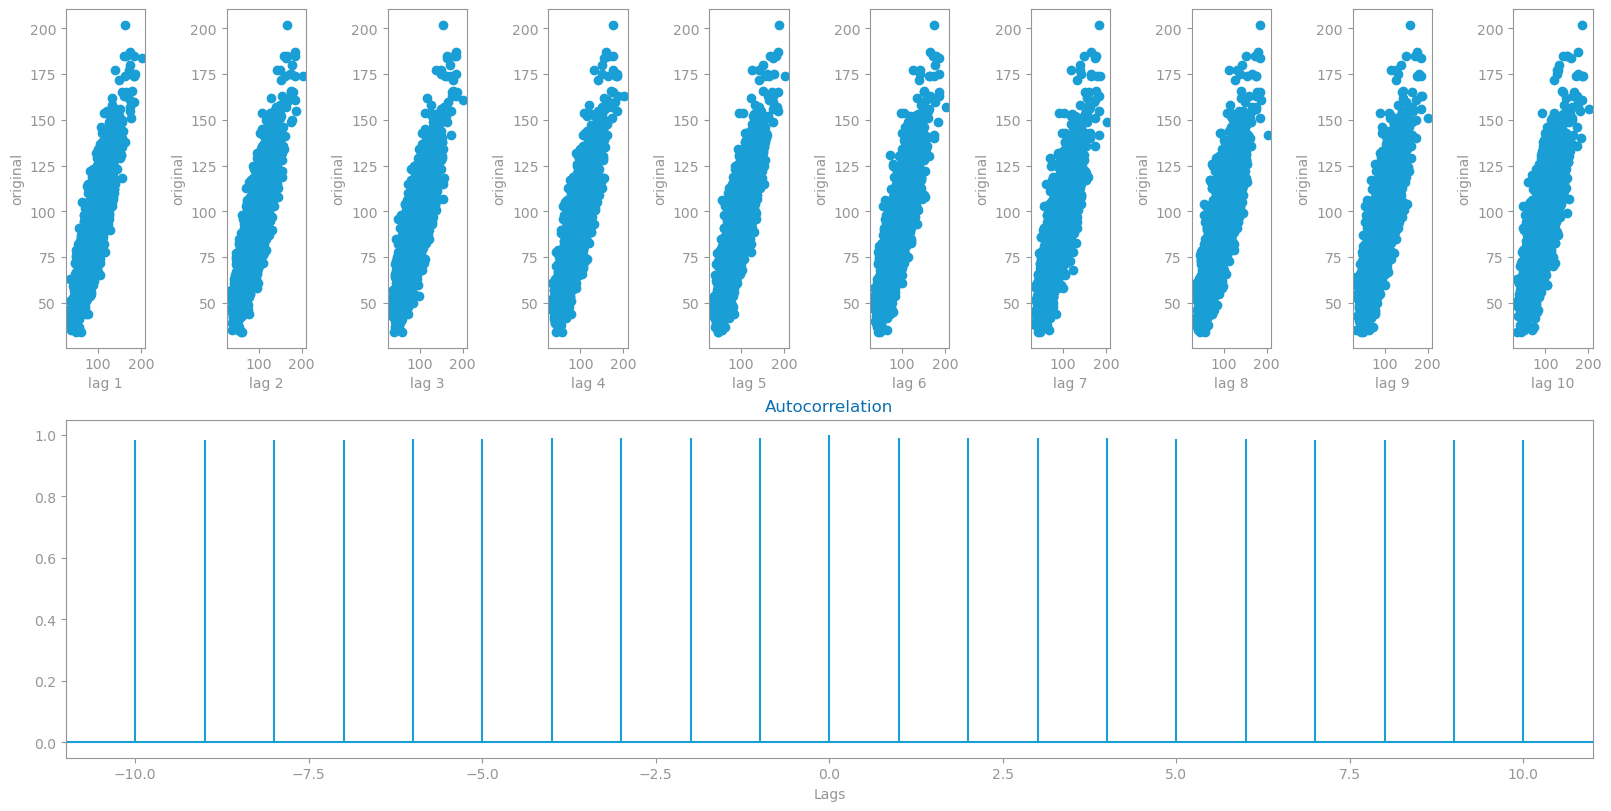

In [ ]:
# available in data_functions.py


autocorrelation_study(series, 10, 1)